NAMA : SYAHRUL GHANI ABDUL RASYAD

NO. REGISTRASI : 1494037162101-1852

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/archive (23).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
base_dir = '/content/Pistachio_Image_Dataset/Pistachio_Image_Dataset'
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir)

In [20]:
#liat label dari data
os.listdir(train_dir)

['Siirt_Pistachio', 'Kirmizi_Pistachio']

In [5]:
##Hapus file yang ngga dibutuhin
!rm '//content/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt'

In [21]:
#Liat label setelah dihapus
os.listdir(train_dir)

['Siirt_Pistachio', 'Kirmizi_Pistachio']

In [22]:
os.listdir(validation_dir)

['Siirt_Pistachio', 'Kirmizi_Pistachio']

In [26]:
#Data augmentasi dan split data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='binary',
                                                    target_size=(128, 128),
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                        class_mode='binary',
                                                        target_size=(128, 128),
                                                        subset='validation')

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


In [36]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.82
       and
       logs.get('val_accuracy')>0.82):
      print("\nAkurasi sudah Cukup!")
      self.model.stop_training = True
callbacks = myCallback()

In [37]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
H = model.fit(train_generator,
              epochs=100,
              validation_data=validation_generator, verbose=2, callbacks=[callbacks])

Epoch 1/100
54/54 - 83s - loss: 0.6716 - accuracy: 0.5963 - val_loss: 0.6421 - val_accuracy: 0.6037 - 83s/epoch - 2s/step
Epoch 2/100
54/54 - 82s - loss: 0.6415 - accuracy: 0.6353 - val_loss: 0.5851 - val_accuracy: 0.6643 - 82s/epoch - 2s/step
Epoch 3/100
54/54 - 81s - loss: 0.6121 - accuracy: 0.6614 - val_loss: 0.6549 - val_accuracy: 0.6154 - 81s/epoch - 2s/step
Epoch 4/100
54/54 - 81s - loss: 0.6149 - accuracy: 0.6579 - val_loss: 0.6191 - val_accuracy: 0.6620 - 81s/epoch - 1s/step
Epoch 5/100
54/54 - 81s - loss: 0.5905 - accuracy: 0.6684 - val_loss: 0.7137 - val_accuracy: 0.6200 - 81s/epoch - 1s/step
Epoch 6/100
54/54 - 81s - loss: 0.5999 - accuracy: 0.6713 - val_loss: 0.6405 - val_accuracy: 0.6410 - 81s/epoch - 2s/step
Epoch 7/100
54/54 - 80s - loss: 0.5946 - accuracy: 0.6835 - val_loss: 0.5987 - val_accuracy: 0.6527 - 80s/epoch - 1s/step
Epoch 8/100
54/54 - 81s - loss: 0.6034 - accuracy: 0.6632 - val_loss: 0.5830 - val_accuracy: 0.6807 - 81s/epoch - 2s/step
Epoch 9/100
54/54 - 80s 

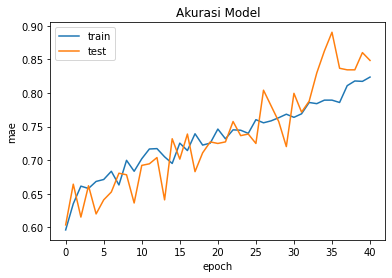

In [40]:
#Membuat plot akurasi
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

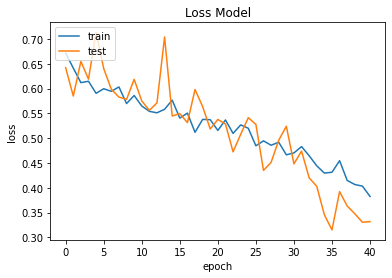

In [41]:
#Membuat plot loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Loss Model')
plt.xlabel("epoch")
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [42]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

40491924